### Uppgift 1:

- del a och b: Initial dataanalys och skapa Vecka kolumn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# a) Läs in data Covid 19 Vaccine 
file_path_vaccinations = '../Lab1/Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx'
data_vaccinations = pd.read_excel(file_path_vaccinations)

# a) Initial dataanalysis
print(data_vaccinations.info())
print()
print(data_vaccinations.describe())
print()
print(data_vaccinations.head())
print()
print(data_vaccinations.value_counts())
print()
print(data_vaccinations.columns)
print()
print(data_vaccinations.index)

In [ ]:
# a) Läs in filen Folkhalsomyndigheten_Covid19
file_path_covid = '../Lab1/Data/Folkhalsomyndigheten_Covid19.xlsx'
data_covid_19 = pd.read_excel(file_path_covid)

# a) Initial dataanalys 
print(data_covid_19.info())
print()
print(data_covid_19.describe())
print()
print(data_covid_19.head())
print()
print(data_covid_19.value_counts())
print()
print(data_covid_19.columns)
print()
print(data_covid_19.index)

In [8]:
# Läs in bladet: "Veckodata Riket" i covid19-filen.
covid_veckodata = pd.read_excel(file_path_covid, sheet_name='Veckodata Riket')

In [9]:
# b) Skapa en ny kolumn 'Vecka'
covid_veckodata['Vecka'] = covid_veckodata['år'].astype(str) + 'v' + covid_veckodata['veckonummer'].astype(str)

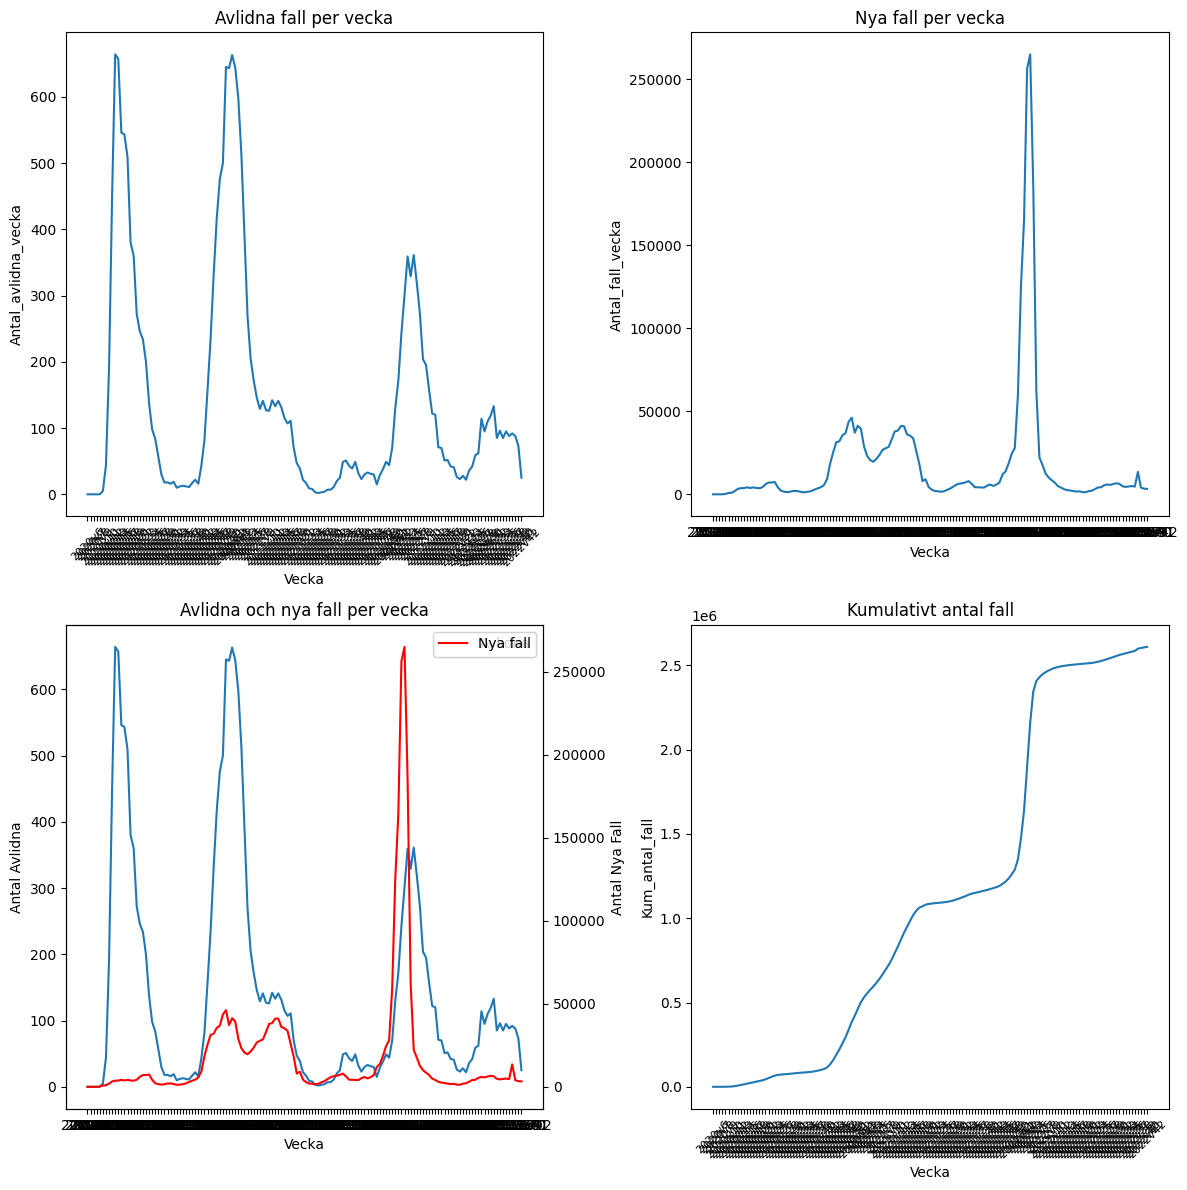

In [10]:
# Seaborn Diagram 

# c) Skapa en 2x2 grid för subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Större figur för att ge mer utrymme till diagrammen

# c) Linjediagram för Avlidna fall per vecka
sns.lineplot(data=covid_veckodata, x='Vecka', y='Antal_avlidna_vecka', ax=axs[0, 0])
axs[0, 0].set_title('Avlidna fall per vecka')
# Rotera x-axelns etiketter till 45 grader och justera textstorleken
axs[0, 0].tick_params(axis='x', rotation=45, labelsize=8)


# d) Linjediagram för Nya fall per vecka
sns.lineplot(data=covid_veckodata, x='Vecka', y='Antal_fall_vecka', ax=axs[0, 1])
axs[0, 1].set_title('Nya fall per vecka')
# Rotera och justera storleken på etiketterna på x-axeln
axs[1, 1].tick_params(axis='x', rotation=45, labelsize=8)
# Justera layouten för att undvika överlappning av titlar och axlar


# e) Linjediagram for både avlidna fall och nya fall per vecka 

# Använd den primära y-axeln för 'Antal_avlidna_vecka'
sns.lineplot(x='Vecka', y='Antal_avlidna_vecka', label='Avlidna',data=covid_veckodata, ax=axs[1,0])
axs[1, 0].set_title('Avlidna och nya fall per vecka')
# Skapa en sekundär y-axel för 'Antal_fall_vecka'
ax2 = axs[1, 0].twinx()
sns.lineplot( x='Vecka', y='Antal_fall_vecka', label='Nya fall', color='r', data=covid_veckodata,ax=ax2)
# Ställ in labels och titlar för båda axlarna
axs[1, 0].set_ylabel('Antal Avlidna')
ax2.set_ylabel('Antal Nya Fall')


# f) Linjediagram för kumulativt antal fall 
sns.lineplot(x='Vecka', y='Kum_antal_fall', data=covid_veckodata, ax=axs[1,1])
axs[1, 1].set_title('Kumulativt antal fall')
plt.tight_layout()


### Lös Uppgift 1  med plotly express

In [11]:
import plotly.express as px

In [12]:
# c) Linjediagram för Avlidna fall per vecka
fig = px.line(covid_veckodata, x='Vecka', y='Antal_avlidna_vecka', title='Avlidna fall per vecka')

# Vissa diagrammet
fig

In [13]:
# d) Linjediagram för nya fall per vecka
fig = px.line(covid_veckodata, x='Vecka', y='Antal_fall_vecka', title='Nya fall per vecka')

# Vissa diagrammet 
fig

In [14]:
# e) Linjediagram för Avlidna och nya fall per vecka in samma fönster

fig = px.line(covid_veckodata, x='Vecka', y=['Antal_avlidna_vecka', 'Antal_fall_vecka'], title='Avlidna och nya fall per vecka')

# Vissa diagrammet 
fig

In [15]:
# Linjediagram för kumulativa fall 
fig = px.line(covid_veckodata, x='Vecka', y='Kum_antal_fall', title='Kumulativa fall')

# Vissa diagrammet 
fig